In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from plotnine import *
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import matplotlib.pyplot as plt
import seaborn as sns

Load the data that was preprocessed in EDA:

In [3]:
full_df = pd.read_csv("full_df.csv")
full_df = full_df.set_index("PassengerId")
full_df

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742


Some preprocessing:

In [4]:
#Take care of missing age by filling with 0 and making a binary column AgeAvail
full_df["AgeAvail"] = np.nan
full_df["AgeAvail"] = full_df["Age"].apply(lambda x: 0 if pd.isnull(x) else 1)#new binary column
full_df["Age"] = full_df["Age"].fillna(0) #fill missing ages with 0
full_df = full_df[pd.notnull(full_df["Embarked"])] #drop 2 rows with Embarked N/A
full_df = full_df[full_df["Age"] < 80] #drop 1 outlier male survived 80 yr old
full_df["RelAb"] = full_df["SibSp"] + full_df["Parch"]#create combined column
full_df

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,AgeAvail,RelAb
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,1,1
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,1,1
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,1,0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,1,1
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,1,0
6,0.0,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877,0,0
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463,1,0
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909,1,4
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742,1,2


In [5]:
qual_cols = ["AgeAvail","Embarked","Sex","Pclass"]
quant_cols = ["Age","RelAb"]

full_df[qual_cols]=full_df[qual_cols].applymap(str)
full_df[quant_cols] = full_df[quant_cols].astype("float64")


Split the data back to train and test from combined dataframe:

In [6]:
TR_TEST_SP = 888
train_df = full_df[:TR_TEST_SP]
test_df  = full_df[TR_TEST_SP:]
test_df = test_df.drop("Survived", axis = 1)
train_df["Survived"] = train_df["Survived"].apply(lambda x: float(x))
train_df

/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,AgeAvail,RelAb
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,1,1.0
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,1,1.0
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,1,0.0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,1,1.0
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,1,0.0
6,0.0,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877,0,0.0
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463,1,0.0
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909,1,4.0
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742,1,2.0


In [7]:
TRAIN_PTS = 888
SPLIT = int((TRAIN_PTS/100.)*70)

In [8]:
train_df = train_df.reindex(np.random.permutation(train_df.index))
valid_df = train_df[SPLIT:]
train_df = train_df[:SPLIT]

In [9]:
y_train = train_df["Survived"]
del train_df["Survived"]

y_valid = valid_df["Survived"]
del valid_df["Survived"]

del full_df["Survived"]
y_valid.head(5)
train_df = train_df[qual_cols+quant_cols]
valid_df = valid_df[qual_cols+quant_cols]
test_df = test_df[qual_cols+quant_cols]
full_df = full_df[qual_cols+quant_cols]

Create columns:

In [10]:
def make_columns(df):
    keep_num = ["Age", "RelAb"] # 
    keep_cat = ["AgeAvail","Pclass","Sex","Embarked"] #
    
    numeric_features = df[keep_num]
    #.select_dtypes(include = ["float64"])
    
    
    numeric_columns = [tf.feature_column.numeric_column(key = feature) for feature in numeric_features]
    categoric_features = df[keep_cat]
    #.select_dtypes(exclude=["float64"]) 
    
    categoric_dict = {}
    for feature in categoric_features:
        categoric_dict[feature] = df[feature].unique()
    
    categoric_columns = [tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=list(categoric_dict[feature])) for feature in categoric_features]
    return numeric_columns, categoric_columns

In [11]:
numeric_columns, categoric_columns = make_columns(full_df)

In [12]:
OUT_DIR = "tf_files_titanic"

In [13]:
!rm -rf tf_files_titanic/

Define f1 metric ff:

In [14]:
def my_f1(labels,predictions):
    
    return {"f1" : tf.contrib.metrics.f1_score()}

Define model function:

In [15]:
def train_linear_estimator(learning_rate, steps, batch_size):
    
    my_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    
    linear_estimator = tf.estimator.LinearClassifier(
        feature_columns = numeric_columns + categoric_columns,
        optimizer = my_optimizer,
        config=tf.estimator.RunConfig(keep_checkpoint_max=1).replace(save_summary_steps=2),
        model_dir=OUT_DIR)
    
    #linear_estimator = tf.contrib.estimator.add_metrics(linear_estimator, rmse)
    
    periods = 10
    steps_per_period = int(steps/periods)
    
    train_input_fn = tf.estimator.inputs.pandas_input_fn(x=train_df,y=y_train,batch_size=batch_size,shuffle=True)
    predict_train_input_fn = tf.estimator.inputs.pandas_input_fn(x=train_df,y=y_train,batch_size=batch_size,shuffle=False)
    predict_valid_input_fn = tf.estimator.inputs.pandas_input_fn(x=valid_df,y=y_valid,batch_size=batch_size,shuffle=False)
    
    training_errors = []
    validation_errors = []
    training_accuracies = [] 
    validation_accuracies = []
    training_f1s = []
    validation_f1s = []
    
    for period in range(0, periods):
        linear_estimator.train(input_fn=train_input_fn,steps=steps_per_period)
        
        train_eval = linear_estimator.evaluate(input_fn=predict_train_input_fn)
        valid_eval = linear_estimator.evaluate(input_fn=predict_valid_input_fn)
        
        train_acc = train_eval["accuracy"]
        train_loss  =  train_eval["loss"]
        train_f1 = (2.0 * train_eval["precision"]*train_eval["recall"]) / (train_eval["precision"]+train_eval["recall"])
        valid_acc = valid_eval["accuracy"]
        valid_loss  = valid_eval["loss"]
        valid_f1 = (2.0 * valid_eval["precision"]*valid_eval["recall"]) / (valid_eval["precision"]+valid_eval["recall"])
        
        #print("Train error: {}".format(train_error))
        #print("Valid error: {}".format(valid_error))
        training_accuracies.append(train_acc)
        validation_accuracies.append(valid_acc)
        training_errors.append(train_loss)
        validation_errors.append(valid_loss)
        training_f1s.append(train_f1)
        validation_f1s.append(valid_f1)
        
        """
        # Take a break and compute probabilities.
        training_predictions = list(classifier.predict(input_fn=predict_training_input_fn))
        training_probabilities = np.array([item['probabilities'] for item in training_predictions])
        training_pred_class_id = np.array([item['class_ids'][0] for item in training_predictions])
        training_pred_one_hot = tf.keras.utils.to_categorical(training_pred_class_id,10)

        validation_predictions = list(classifier.predict(input_fn=predict_validation_input_fn))
        validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])    
        validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
        validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,10)    

        # Compute training and validation errors.
        training_log_loss = metrics.log_loss(training_targets, training_pred_one_hot)
        validation_log_loss = metrics.log_loss(validation_targets, validation_pred_one_hot)
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, validation_log_loss))
        # Add the loss metrics from this period to our list.
        training_errors.append(training_log_loss)
        validation_errors.append(validation_log_loss)

        train_accuracy = metrics.accuracy_score(training_targets, training_pred_class_id)
        valid_accuracy = metrics.accuracy_score(validation_targets, validation_pred_class_id)
        training_accuracies.append(train_accuracy)
        validation_accuracies.append(valid_accuracy)
        """
    
 
    # Calculate final predictions (not probabilities, as above).
    #final_predictions = linear_estimator.predict(input_fn=predict_valid_input_fn)
    #final_predictions = np.array([item['class_ids'][0] for item in final_predictions])


    #accuracy = metrics.accuracy_score(y_valid, final_predictions)
    #print("Final accuracy (on validation data): %0.2f" % accuracy)

    f = plt.Figure()
    graph1 = f.add_subplot(311)
    graph2 = f.add_subplot(312,sharex=graph1)
    graph3 = f.add_subplot(313,sharex=graph1)
    
    ax = plt.subplot("311")
    ax.clear()
    ax.set_title("Accuracy over time")
    ax.plot(training_accuracies, label="training error")
    ax.plot(validation_accuracies, label="validation error")

    ax = plt.subplot("312")
    ax.clear()
    ax.set_title("Loss over time")
    ax.plot(training_errors, label="training loss")
    ax.plot(validation_errors, label="validation loss")
    
    ax = plt.subplot("313")
    ax.clear()
    ax.set_title("F1 over time")
    ax.plot(training_f1s, label="training f1")
    ax.plot(validation_f1s, label="validation f1")
    
    return linear_estimator

Train model:

INFO:tensorflow:Using config: {'_model_dir': 'tf_files_titanic', '_tf_random_seed': None, '_save_summary_steps': 2, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4c9f7da470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow

/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_files_titanic/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10 into tf_files_titanic/model.ckpt.
INFO:tensorflow:loss = 44.83303, step = 10
INFO:tensorflow:Saving checkpoints for 20 into tf_files_titanic/model.ckpt.
INFO:tensorflow:Loss for final step: 26.277573.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-26-05:39:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_files_titanic/model.ckpt-20
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-26-05:39:21
INFO:tensorflow:Saving dict for global step 20: accuracy = 0.6763285, accuracy_baseline = 0.60386

INFO:tensorflow:Saving checkpoints for 40 into tf_files_titanic/model.ckpt.
INFO:tensorflow:loss = 36.779373, step = 40
INFO:tensorflow:Saving checkpoints for 50 into tf_files_titanic/model.ckpt.
INFO:tensorflow:Loss for final step: 21.559597.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-26-05:39:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_files_titanic/model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-26-05:39:42
INFO:tensorflow:Saving dict for global step 50: accuracy = 0.7890499, accuracy_baseline = 0.6038647, auc = 0.8562601, auc_precision_recall = 0.82379377, average_loss = 0.5321108, global_step = 50, label/mean = 0.39613527, loss = 33.044083, precision = 0.8484849, prediction/mean = 0.40082243, recall = 0.5691057
INFO:tensorflow:Saving 'checkpoint_path' summary for global 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-26-05:40:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_files_titanic/model.ckpt-80
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-26-05:40:03
INFO:tensorflow:Saving dict for global step 80: accuracy = 0.7858293, accuracy_baseline = 0.6038647, auc = 0.86046064, auc_precision_recall = 0.8270753, average_loss = 0.49649012, global_step = 80, label/mean = 0.39613527, loss = 30.832037, precision = 0.83040935, prediction/mean = 0.37256986, recall = 0.57723576
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 80: tf_files_titanic/model.ckpt-80
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-26-05:40:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_files_titanic/model.c

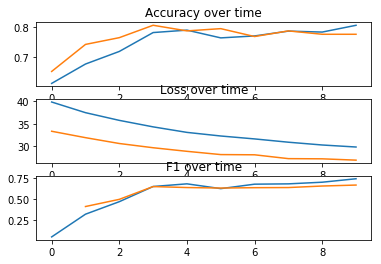

In [16]:
model = train_linear_estimator(learning_rate=0.01, steps = 400, batch_size=64)

Generate submission:

In [17]:
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(x=test_df,batch_size=64,shuffle=False)

generator = model.predict(input_fn=predict_test_input_fn)
predictions = [next(generator) for i in range(len(test_df))]
classes = [int(predictions[i]["classes"][0]) for i in range(len(predictions))]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_files_titanic/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [18]:
submission = pd.DataFrame()
submission["PassengerId"] = test_df.index
submission = submission.set_index("PassengerId")
submission["Survived"] = classes
submission.to_csv("mtolstok_titanic_pred_linear_est.csv")